In [5]:
#Here we are importing the emissions data

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from datetime import date


sourceName = []   
state = []
oris = []
emissions = []  
opHours = []    
dateMonitor = []   
pageData = 0
maxPage = 0

while pageData <= maxPage:

    
    url = "https://rggi-coats.org/eats/rggi/index.cfm?hc=IiguXCAK"

    payload = {'fuseaction' : 'reportsV2.quarterly_emissions_rpt_output',
    'reporttype' : 'F',
    'FILTER_BEGINNING_YEAR' : '2009',
    'FILTER_ENDING_YEAR' : '2015',
    'FILTER_BEGINNING_QUARTER' : '1',
    'FILTER_ENDING_QUARTER' : '4',
    'SRC_NUMBER' : '',
    'SRC_NAME' : '',
    'REGION_ID' : '0',
    'page': pageData,
    'sourcesselected' : '',
    'returnfuseaction' : 'reportsv2.quarterly_emissions_rpt',
    'src_id' : 'TSlOP19UOlZTIyU9I19cTFJHPCs+XlAnIzJPWylULSc1M0xENl9KVl8jSlc/U1xQU1EgW1xeJFhVU10/LgpNVSBDK1FAWkpSIFwqU0U/NFpKRjMjIFssUVo7VzM6W1hKRVQhOi9fTVQsRSsiL18tXiheV0ssNT0hTFBfCk03TE05I0xWMyNYRylSRjMxK0A8KSFOVzVbTlM/JiRCN1U+PzVbL0ciVydXSlRPRzMrX1MuWC9RPlNPR18KTSpNX0VRPC8pXyhLMydAOyJbX10xN108NEBOXytLPDNOVjI/M1dHVC0gTSo/UyxfRlBOXzJXXFtfUFw3PgpNX00ySTVeLzBCL0ZKUjw4NzpNXCJbOldBU0FXKyUsQDspPT9fMiZTMlBAKyxKKk9XIz47WVJPPyJbOk5LCk1XLCtaVUVNSCIvTVJQRC8tSj0vNyJAVEIjVURRUi4zWCstSypTKCpPRDw/O19cKk4qXCszUl0yQ1JNO1UKTVlMXzdaKlA3UiJbLlk8NzUqRVdcXjxdNltcVC9UQlEyVURbN14kPD9RQT9dXl0vUFldOyhUQCQ6UiBcPgpNUCEnNlpKTEkzWUNCUlg0S0kgUzJQTkwlMTxXMlIgRU8hJDYzU19cK1M8XyUlXF8nID9ANSIgTytSITMyCk1ZLTMmXik7MV9EXT83Xls7VT48JyEvXypVX0cnJ1InVlsgM1tQXTciVV43IzFNTDEwTkdDUlBDQFlFMkwKTVhCRSc3PkwsQ0xTIV4gPy4hTCpTNUw7LkdcMlBYREU2USxbN1IgNC1BTE9fN1hbLlAgLDBFTF03KV5bQQpNX0pPP1EvWisjXC1fJ1hJMlosREtdJD0ySzxXIlZaMzsqQT5OSFAsV0FfW0lQVyc6UiBUKFoxWyNKXE9eCk0gJzAzWyBPIyhdOylfL189NyJQV1JcN0VTPSMwW0BbOV9dI1VfXTwgUU9YNUcuSzQnLjtQWyArKlpMRzUKTSVfWyJSIEgzUyxUOFVQOjtTTU8nV10hKldcRy8yTD81XkxLXSJNID8wRlsjWU4/Q1VaOzcrPzJVUkBfRgpNS1xNM1UvXCxXVEEzKywsN1ZVXCpCLEU8VjQnMldNVE4zPks/MkBcLV9MPScmR0xLJlI8OlFAW05VTFpRCk0yJ0UqX1wjOFldOy4gUD81Jy0/I1hQQCBTPD8qJV4/O19CXD5bXEspUVwrSiEyVzpRP10vUExdKTdBMk4KTVVGJFUgRVwiUSwwNTNHW15XXFIyUF9eLlsuS18gX1NaNzwmOSFCRzpTLEgxQ04vT1ddKDVfXVRPUTFVVQpNIF5LOCBMPz5bTDsuUy1TO1tMPC5TIFs/XkovKChcUz9BOD0jI1wrI1MgPy9fUl8nVVxVLjM8SzZQQlc9Ck1SIEtCQ1w8IjcqXFZSSjtOVT9PU1NNPCVVOlBWX09fLyUsLDNXTkcvUExIO1NYWyJRUjAlKSxcIkE6RzAKTVYsXE5RRkhTM1gsL1k8LzBXLE88M11AI1ZCVygpLDc+Xi1cKkFfLFJfPCs2WiVfVSNOO09bT1crUiJcLwpNUywrQFBPUyxbKlQjSEArPjRYICZbPDxPXl5HNks8XDQ7Xl8/UEhbPVJMPzVQXFIiITBfU1MgPShQRTg7Ck0iLFwoJyE7O1c8MjhRTiAzVV1dKCs9Tz9DTk0pK1BbOlMgUk9VMj5VMipcLUtMR0MhTV00Vy9cNSFKTCcKTVosIlMhTVc/RzxPUENcUzchUDAyU1xNIkctWlU1IFddUlVeVyMgXy9WQE06U0E7LlM+QzZeXC9MVDBHMQpNUEBfO0hRIz9TXlIlUixbQyM+Xz4gLDBbQE9SSVFQSz8xQFVbU0EvUlcvW0gkRD07QF1cPSIvSDJZXE0/Ck0gVEkyU1xPIyMoVUdXPEQqNlw1NyJNOyYxPSJQWFgrRlFOODkrPkw6UkxLU1NaVE8rPEdDU11PTyAsUyEKTStMKkxYUF8zUE1fIlQ8RiUrTFQuVzxAN0tcWy5eRUsyUEFLOVFQPD5VXUsjPixfMUNcXy1UIE8nXyE6TwpNUzY/U0tdP1lLPCdbM0FTN1UxSzJXQEQ+MFhfUyNAUyVeRDMrWi1bXidHRzZfRTs8VVRMM1ciL0hXWSoxCk0nJFI+QipbM0osVydaQSAqW01NXldeJyhDTD8pUj00IEJMXkpZLzdAX1g8JlNPOSMjJEQkPjxTVSE+RCQKTVBUMzJVPFcuUlA+PlFOWyIiXFdDU14tTCFYUzpTXEUrVi9FM1BOXEIjMCczM0xLX1VFPTcyLCstK0pbVQorUiQ7TSJMX1M+TTwpMz9cIAo='
    }

    #Request the data
    r = requests.post(url, payload)

    #save the data in a html
    with open("requests_results.html", "w") as f:

        f.write(r.content)

    #Open the data with beautiful
    plantData = BeautifulSoup(open('requests_results.html'))
    
    #Find how many pages there is
    maxPage = plantData.find_all('span', {'class': "fuse"})
    for tag in maxPage:
        maxPage = tag.find_all('b')
        for tag in maxPage:
            maxPage = tag.get_text()
    maxPage = float(maxPage[-8:-4]) // 100
    
    
    #Clean html
    plantData = plantData.find_all('tr', {'valign': "baseline"})

    lineData= 0
    for tag in plantData:
        plantData[lineData] = tag.find_all('td')
    
        columnData = 0
        for tag in plantData[lineData]:
            plantData[lineData][columnData] = tag.get_text().encode('ascii', 'ignore')
            columnData = columnData +1
    
        lineData = lineData +1


    #Organize the data
    for i in range (0,len(plantData)):
    
        #Emissions which we also transform to float
        if plantData[i][-4] == 'Not Operating' or plantData[i][-4] == 'No Data':
            emissions.append(0)
        else:
            emissions.append(float(plantData[i][-4].replace(",", "")))

        #opHours which we also transform to float
        if plantData[i][-6] == 'Not Operating' or plantData[i][-6] == 'No Data':
            opHours.append(0)
        else:
            opHours.append(float(plantData[i][-6].replace(",", "")))

        #dateMonitor which we also transform to date using year and quarter
        dateMonitor.append(date(int(plantData[i][0]),(int(plantData[i][1])-1)*3+1,1))

        #sourceName 
        sourceName.append(plantData[i][2])
        
        #state 
        state.append(plantData[i][5])
        
        #oris 
        oris.append(plantData[i][3])

 
    pageData = pageData + 1
            

plantSummary = pd.DataFrame({'Plant_Name': sourceName,
                            'Operating_Hours': opHours,
                            'State': state,
                             'Oris': oris,
                            'Emissions': emissions,
                            'Date_Monitor': dateMonitor})


plantSummary.head()


,Date_Monitor,Emissions,Operating_Hours,Oris,Plant_Name,State
0,2009-01-01,2574.935,89.10,544,Devon,CT
1,2009-04-01,589.222,24.69,544,Devon,CT
2,2009-07-01,1156.144,48.24,544,Devon,CT
3,2009-10-01,4496.612,158.34,544,Devon,CT
4,2010-01-01,2445.324,87.80,544,Devon,CT


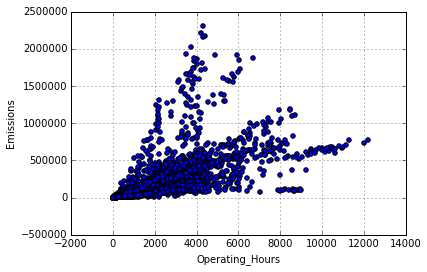

In [6]:
#Here we are doing a graph to start vizualising the data

import matplotlib.pyplot as plt
%matplotlib inline  
plantSummary.plot(kind = 'scatter', x = 'Operating_Hours', y = 'Emissions' )

In [7]:
plantSummary.groupby(plantSummary.State).sum().sort('Emissions',ascending=False)

,Emissions,Operating_Hours
State,,
NY,2.229665e+08,2965151.21
MD,1.512589e+08,759258.86
MA,9.607211e+07,848833.77
NJ (First Control Period Only),5.315729e+07,643226.59
CT,4.316031e+07,473015.45
NH,3.399438e+07,299951.68
DE,2.610292e+07,333965.39
RI,2.063195e+07,274978.84
ME,1.955019e+07,283177.66


In [8]:
#Here we are importing the owner data

stateAll = [2,4,5,6,7,8,9,11,12]
sourceNameOwner = []
orisOwner = []
ownerName = []
    
for state in stateAll:
    
    url = "https://rggi-coats.org/eats/rggi/index.cfm?hc=ISggICAK"

    payload = {'fuseaction' : 'reportsv2.owners_rpt',
    'expandFilter' : '1',
    'setFilter' : 'true',
    'PROG_ID' : state,
    }

    #Request the data
    r = requests.post(url, payload)

    #save the data in a html
    with open("owner_results.html", "w") as f:

        f.write(r.content)

    #Open the data with beautiful
    ownerData = BeautifulSoup(open('owner_results.html'))
    
    #Clean html
    ownerData = ownerData.find_all('tr', {'valign': "baseline"})

    lineData= 0
    for tag in ownerData:
        ownerData[lineData] = tag.find_all('td')
    
        columnData = 0
        for tag in ownerData[lineData]:
            ownerData[lineData][columnData] = tag.get_text().encode('ascii', 'ignore')
            columnData = columnData +1
    
        lineData = lineData +1

    
    #Organize the data
    for i in range (0,len(ownerData)):
    
        #sourceName 
        sourceNameOwner.append(ownerData[i][0])
        
        #Oris code
        orisOwner.append(ownerData[i][2])

        #Owner
        ownerName.append(ownerData[i][4])
        
ownerSummary = pd.DataFrame({'Source_Name_Owner': sourceNameOwner,
                            'Oris_Code_Owner': orisOwner,
                            'Name_Owner': ownerName,
                             })


ownerSummary.head()



,Name_Owner,Oris_Code_Owner,Source_Name_Owner
0,New York Power Authority (Owner-Operator),7910,23rd and 3rd
1,"AG Energy, LP (Owner-Operator)",10803,AG - Energy
2,Allegany Generating Station (Owner-Operator),10619,Allegany Station No. 133
3,"NRG Arthur Kill Operations, Inc. (Operator)\rA...",2490,Arthur Kill
4,"Astoria Energy, LLC (Owner)\rGDF Suez Energy, ...",55375,Astoria Energy


In [10]:
#Here we are merging the two last tables and droping some columns

owner_Emission_Summary = pd.merge(plantSummary, ownerSummary, how='inner', 
               left_on='Oris', right_on='Oris_Code_Owner')
owner_Emission_Summary = owner_Emission_Summary.drop(['Source_Name_Owner','Oris_Code_Owner'], axis=1) 

In [11]:
#The data looks clean!
owner_Emission_Summary.head()

,Date_Monitor,Emissions,Operating_Hours,Oris,Plant_Name,State,Name_Owner
0,2009-01-01,2574.935,89.10,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
1,2009-04-01,589.222,24.69,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
2,2009-07-01,1156.144,48.24,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
3,2009-10-01,4496.612,158.34,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
4,2010-01-01,2445.324,87.80,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."


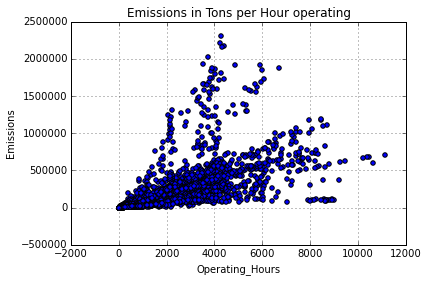

In [16]:
#Now we can do some more vizualisation to impress people :) wowwww

pd.options.display.float_format = '{:20,.2f}'.format
owner_Emission_Summary.plot(kind = 'scatter', x = 'Operating_Hours', y = 'Emissions', title="Emissions in Tons per Hour operating" )


In [ ]:
#How did emissions evolve?
owner_Emission_Summary.groupby(['State',owner_Emission_Summary['Date_Monitor'].map(lambda x: x.year)])[['Emissions']].sum().unstack('State').plot(y = 'Emissions',xticks=['2009','2010','2011','2012','2013','2014','2015'])
plt.legend(loc=2)

In [109]:
owner_Emission_Summary['Efficiency']=owner_Emission_Summary['Emissions']/owner_Emission_Summary['Operating_Hours']

In [234]:
owner_Emission_Summary.groupby([owner_Emission_Summary['Date_Monitor'].map(lambda x: x.year),'Plant_Name'])[[Emissions'.sum()]].sort('Emissions',ascending=False)

KeyError: 'Columns not found: 607468954.17700005'